In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def sample_theta_cosn(N, n):
    samples = []
    with tqdm(total=N, desc=f"Sampling θ, cos^{n}(θ)") as pbar:
        while len(samples) < N:
            theta_candidate = np.random.uniform(0, np.pi/2)
            p = np.cos(theta_candidate)**n
            if np.random.uniform(0, 1) < p:
                samples.append(theta_candidate)
                pbar.update(1)
    return np.array(samples)

In [10]:
n = 2
theta = sample_theta_cosn(int(5e3),n)

Sampling θ, cos^2(θ): 100%|██████████| 5000/5000 [00:00<00:00, 92408.35it/s]


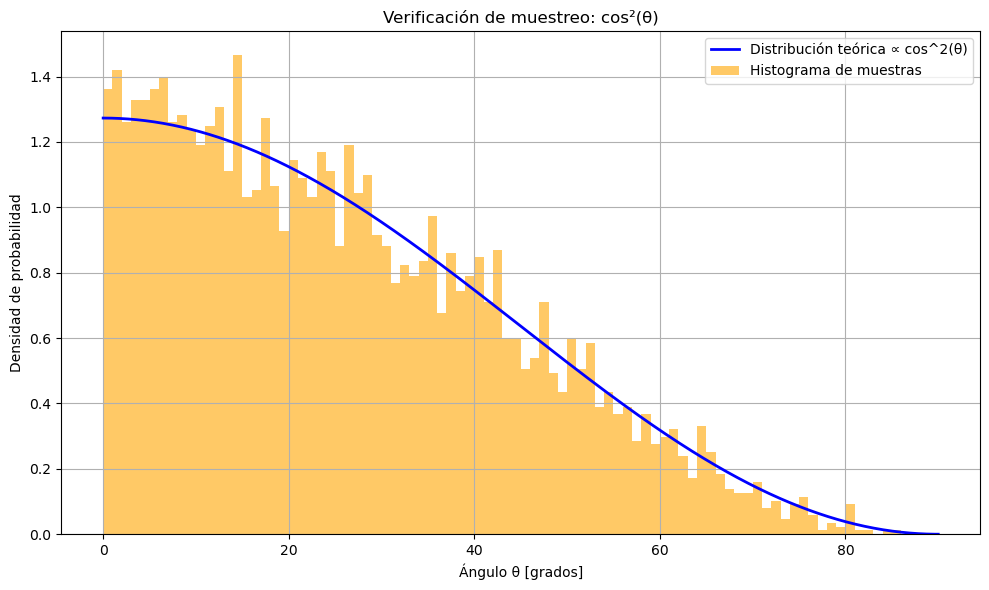

In [11]:
counts, bins = np.histogram(theta, bins=90, range=(0, np.pi/2), density=True)
bin_centers_rad = 0.5 * (bins[:-1] + bins[1:])
bin_centers_deg = np.rad2deg(bin_centers_rad)

theta_vals = np.linspace(0, np.pi/2, 1000)
pdf = np.cos(theta_vals)**2
pdf /= np.trapz(pdf, theta_vals) # Normalization

plt.figure(figsize=(10, 6))
plt.bar(bin_centers_deg, counts, width=np.rad2deg(bins[1]-bins[0]), alpha=0.6,
        label='Histograma de muestras', color='orange')
plt.plot(np.rad2deg(theta_vals), pdf, 'b-', linewidth=2, label=f'Distribución teórica ∝ cos^{n}(θ)')
plt.xlabel('Ángulo θ [grados]')
plt.ylabel('Densidad de probabilidad')
plt.title('Verificación de muestreo: cos²(θ)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
"""import matplotlib.colors as mcolors

bin_centers_deg = np.rad2deg((bin_edges[:-1] + bin_edges[1:]) / 2)
norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = plt.colormaps.get_cmap('jet')
colors = cmap(norm(prob_acceptance_per_bin))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.bar(
    bin_centers_deg,
    prob_acceptance_per_bin,
    width=np.rad2deg(bin_edges[1] - bin_edges[0]),
    color=colors
)
ax1.set_title('Aceptancia del Hodoscopio (1D)')
ax1.set_xlabel('Ángulo θ [grados]')
ax1.set_ylabel('Aceptancia Relativa')
ax1.grid(True)
ax1.set_xlim(0, 90)
ax1.set_ylim(0, 1)
ax1.axvline(np.rad2deg(theta_max), color='black', linestyle='--', label=r'$θ_{max}$')
ax1.legend()

extent = [bin_edges_2d[0], bin_edges_2d[-1], bin_edges_2d[0], bin_edges_2d[-1]]
im = ax2.imshow(
    acceptance_2D.T,
    extent=extent,
    origin='lower',
    cmap=cmap,
    aspect='auto'
)
ax2.set_title("Aceptancia del Hodoscopio (2D)")
ax2.set_xlabel(r'$\theta_x$ [grados]')
ax2.set_ylabel(r'$\theta_y$ [grados]')
plt.colorbar(im, ax=ax2, label='Aceptancia Relativa')

plt.tight_layout()
plt.show()"""

'import matplotlib.colors as mcolors\n\nbin_centers_deg = np.rad2deg((bin_edges[:-1] + bin_edges[1:]) / 2)\nnorm = mcolors.Normalize(vmin=0, vmax=1)\ncmap = plt.colormaps.get_cmap(\'jet\')\ncolors = cmap(norm(prob_acceptance_per_bin))\n\nfig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))\n\nax1.bar(\n    bin_centers_deg,\n    prob_acceptance_per_bin,\n    width=np.rad2deg(bin_edges[1] - bin_edges[0]),\n    color=colors\n)\nax1.set_title(\'Aceptancia del Hodoscopio (1D)\')\nax1.set_xlabel(\'Ángulo θ [grados]\')\nax1.set_ylabel(\'Aceptancia Relativa\')\nax1.grid(True)\nax1.set_xlim(0, 90)\nax1.set_ylim(0, 1)\nax1.axvline(np.rad2deg(theta_max), color=\'black\', linestyle=\'--\', label=r\'$θ_{max}$\')\nax1.legend()\n\nextent = [bin_edges_2d[0], bin_edges_2d[-1], bin_edges_2d[0], bin_edges_2d[-1]]\nim = ax2.imshow(\n    acceptance_2D.T,\n    extent=extent,\n    origin=\'lower\',\n    cmap=cmap,\n    aspect=\'auto\'\n)\nax2.set_title("Aceptancia del Hodoscopio (2D)")\nax2.set_xlabel(r\'$\